# Data Pre-Processing

The machine learning process generally follows a structured, step-by-step approach, which can be broken down into three main phases:

1. Data Pre-processing:
    - Import the data
    - Clean the data
    - Encoding data
    - Split the data into training and test sets
    - Feature scaling
2. Modeling:
    - Build the machine learning model
    - Train the model on the training data
    - Make predictions using the model
3. Evaluation:
    - Calculate performance metrics to assess how well the model performs
    - Determine if the model is a good fit for the data and fulfills its intended purpose

This process is key to building effective machine learning models, and throughout the examples, you'll gain practical experience applying these steps.

## Introduction

We will explore in detail the **Pre-processing** process, which is common to all machine learning algorithms.
It is important to master this pre-processing step before exploring the different algorithms.

Data preprocessing is the crucial first step in any machine learning project because it transforms raw data into a clean, consistent format for the model:
- Data Quality: Raw data often contains errors like missing values or duplicates. Preprocessing cleans this up to ensure the model learns from accurate data, leading to better predictions.
- Consistency: Different formats across data sources can confuse the model. Preprocessing standardizes formats, ensuring consistent analysis.
- Performance: Preprocessing highlights important features and reduces noise, enabling the model to find patterns more effectively and make more accurate predictions.
- Efficiency: By simplifying data, preprocessing makes the model faster and more efficient, helping it focus on what matters most.

Preprocessing ensures your data is clean, organized, and ready for the model, improving both accuracy and efficiency.

### Importing the libraries

The first step in building machine learning models is to import the necessary libraries. In this case, we’ll work with three essential libraries:

In [56]:
# numpy helps us work with arrays, which are commonly used as input for machine learning models.
# It is typically imported with the shortcut np.
import numpy as np

# matplotlib creates charts and graphs.
# It is usually imported with the shortcut plt.
import matplotlib.pyplot as plt

# Pandas is used for data manipulation and preprocessing, such as importing datasets
# and creating matrices of features and dependent variables.
# It is commonly imported with the shortcut pd.
import pandas as pd

### Importing the dataset

To begin data pre-processing in machine learning, the first step is to import a dataset. In this example, we are working with a CSV file, data.csv, which contains customer information for a retail company, including country, age, salary, and whether they purchased a product.

In [64]:
# We use the read_csv function from Pandas to import the dataset, which is typically a CSV file
# This reads the file and stores it as a data frame, which holds all rows and columns of data from the CSV.
dataset = pd.read_csv('./pp/Data.csv')
dataset.head() # display the first few rows

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In any machine learning model, the dataset is split into two parts:
- **Features** (Independent Variables): The information used to make predictions, typically the columns other than the last one.
- **Dependent Variable**: The target outcome we want to predict, typically the last column in the dataset.

In [67]:
# the features "X" include country, age, and salary
X = dataset.iloc[:, :-1].values # get all the rows and get all the column except the last one
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [69]:
# the dependent variable "y" is whether the customer purchased the product or not
y = dataset.iloc[:, -1].values # get all the rows and get only the last column
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

### Taking care of missing data

Missing data can cause errors when training machine learning models, so it’s important to handle it properly. There are two common approaches:

1. Ignoring or Deleting Missing Data:
This method works well when the amount of missing data is minimal (e.g., less than 1%). Deleting a small percentage of data may not significantly impact the model's performance.

2. Replacing Missing Data:
A more common and reliable approach is to replace missing values with a calculated statistic, such as the mean of the column. This ensures that no data is lost, especially when there are large amounts of missing values.

In [73]:
# As we can see here, we have missing age for Spain and missing salary for Germany
# We want to replace this missing salary and age by the average
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [76]:
# Import the library that handle missing data
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer specifying the replacement strategy.
# In this case we replace all missing values "missing_values=np.nan" with the mean "strategy='mean'"
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# The fit() method connects the imputer to the data by analyzing the columns with
# numerical values and calculating statistics like the mean or median.
# We give our last two columns that contains age and salary to the imputer
imputer.fit(X[:, 1:3])

# The transform() method applies the transformation to the data by replacing missing values
# with the calculated statistics. The result is an updated matrix of features with no missing values.
# Then we update the original matrix X, replacing the missing values in the specified columns with the mean values.
X[:, 1:3] = imputer.transform(X[:, 1:3])

# By using both the fit() and transform() methods, you ensure that your matrix of features
# is complete and ready for further processing, avoiding errors
# in your machine learning model caused by missing data.
# As we can see here, all the missing values were replaced by the mean of each column.
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### Encoding Categorical Data

In machine learning, we often need to convert categorical data (like country names) into numerical data so that models can process them. However, a simple numerical encoding (e.g., France = 0, Spain = 1, Germany = 2) can create unintended relationships between categories that don’t exist, as the model may incorrectly assume an order between these numbers.

To avoid this issue, we use **one-hot encoding**, which transforms a single categorical column into multiple binary columns. For example, the "country" column with values like "France," "Spain," and "Germany" is converted into three binary columns:

- France: **[1, 0, 0]**
- Spain: **[0, 1, 0]**
- Germany: **[0, 0, 1]**

This method removes any implied numerical order between categories.

Additionally, binary categorical data (such as "yes" or "no" values in the "purchased" column) can be safely encoded as 0 and 1 without negatively impacting the model.

In [81]:
# To perform one-hot encoding in Python, we use the ColumnTransformer and OneHotEncoder
# These tools automate the conversion of categorical columns into binary columns,
# allowing machine learning models to interpret and process them correctly.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Step 1: Let's now encode the features "X"

"""
We start by creating an object of the ColumnTransformer class.
This object is responsible for applying transformations to specific columns.

In the transformers argument, we specify three things:
  - The type of transformation (e.g., "encoder" for one-hot encoding).
  - The transformer to apply (e.g., OneHotEncoder()).
  - The index of the column to transform (e.g., the "country" column, which has index 0).

We also set the remainder argument to "passthrough" to ensure that columns not being transformed (e.g., age and salary) are retained.
"""
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')


# the fit_transform() method is used
# to fit the ColumnTransformer to the data and apply the transformation in one step.
# The result is an updated matrix of features with one-hot encoded columns.
X = ct.fit_transform(X)

# Since machine learning models expect the feature matrix (X) as a NumPy array,
# we convert the result of fit_transform() to a NumPy array using np.array().
X = np.array(X)

# This process efficiently transforms categorical data into a suitable format
# for machine learning models while ensuring that the rest of the feature matrix remains intact.
# Let's check how our countries were transformed
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [99]:
# Step 2: Let's now encode the dependant variable "y"

"""
for binary categorical data in the dependent variable (e.g., "yes" and "no"),
we use label encoding.
Label encoding converts these text values into binary numerical values:

  - "No"  becomes 0
  - "Yes" becomes 1
"""

# This transformation is done using the LabelEncoder class from scikit-learn.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# The fit_transform() method quickly converts the text into corresponding
# numerical values for the dependent variable vector, which is now ready for model training.
y = le.fit_transform(y)

# By label encoding for binary outcomes, you ensure that categorical data is
# in a format that machine learning models can process effectively.
# Let's check the result of the transformation
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Splitting the dataset into Training set and Test set

When preparing data for machine learning models, there are two key steps: **splitting the dataset** into training and test sets, and applying **feature scaling**.

1. Splitting the Dataset, the dataset is split into two parts:
    - Training Set: Used to train the model on existing observations.
    - Test Set: Used to evaluate the performance of the model on new, unseen data, simulating future predictions.
2. Feature Scaling:
    - Feature scaling ensures that all features are on the same scale to prevent one feature from dominating others. This step adjusts the variables so that they take values within the same range, usually by normalizing or standardizing the data.

**Feature Scaling must be applied AFTER splitting the dataset**

The reason for this is to avoid **information leakage**. The test set is meant to represent new, unseen data. If you apply feature scaling before the split, you would be calculating the mean and standard deviation using the entire dataset, including the test set. This would allow the model to "see" the test data during training, which defeats the purpose of having a separate test set and leads to an inaccurate evaluation of model performance.

By applying feature scaling after the split, you ensure that the test set remains untouched during training, preserving its role as new data to validate the model’s true performance.

In [101]:
# To split the dataset, we use the train_test_split function from scikit-learn’s model_selection module.
from sklearn.model_selection import train_test_split

"""
The function train_test_split splits the dataset into four sets:
  X_train: Matrix of features for the training set.
  X_test:  Matrix of features for the test set.
  y_train: Dependent variable for the training set.
  y_test:  Dependent variable for the test set.

The main parameters are:
  X: Matrix of features.
  y: Dependent variable vector.
  test_size: Specifies the proportion of data to allocate to the test set (e.g., 20% or 0.2).
  random_state: A fixed seed to ensure reproducibility of the split.

The function returns four sets: X_train, X_test, y_train, and y_test.
Typically, 80% of the data is assigned to the training set and 20% to the test set.
This ratio ensures the model has enough data to learn from while still reserving a portion for evaluation.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [103]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [105]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [107]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [109]:
y_test

array([0, 1])

### Feature Scaling

**Feature scaling** is the process of putting all features on the same scale to prevent certain features from dominating others due to differences in their magnitudes. However, feature scaling is not necessary for all machine learning models but is crucial for models sensitive to the scale of data, such as gradient-based algorithms (e.g., logistic regression, support vector machines).

There are two Main Techniques:
- Standardization:
  - Formula: Subtract the mean of the feature and divide by the standard deviation.
  - Result: Values are typically scaled between -3 and +3.
  - Works well for all types of data, making it a reliable go-to method.
- Normalization:
  - Formula: Subtract the minimum value of the feature and divide by the range (maximum - minimum).
  - Result: Values are scaled between 0 and 1.
  - Best used when features follow a normal distribution.

Feature scaling should always be applied **after splitting** the dataset into training and test sets. This is to prevent information leakage from the test set into the training process. Feature scaling is fitted on the training data (X_train), and then the same scaling transformation is applied to the test data (X_test), using the mean and standard deviation calculated from X_train.

Practical Recommendation:
    - Standardization is generally preferred because it works well across various scenarios and always improves model performance by ensuring consistent feature scaling.
    - Normalization is ideal when you have normally distributed data.

Standardization should only be applied to numerical features, not to dummy (one-hot encoded) variables.
Dummy variables (e.g., binary 0s and 1s representing categorical data)
are already on the same scale, and applying scaling to them would distort the interpretation of these values.

Dummy variables already take values between 0 and 1, so scaling them is unnecessary
and could result in the loss of interpretability.
For instance, you may lose the ability to identify which binary values represent specific categories
(e.g., countries). Moreover, applying scaling to dummy variables
does not significantly improve model performance, and in most cases,
it can even make the interpretation harder.

Thus, feature scaling should be applied only to the numerical variables
(e.g., age, salary) where the scale differs significantly.
This ensures that your machine learning models are properly trained
without distorting categorical information.

In [113]:
# To apply feature scaling, we use the StandardScaler class from the scikit-learn library,
# which standardizes the features by subtracting the mean and dividing by the standard deviation.
from sklearn.preprocessing import StandardScaler

# Initiate the scaler object
sc = StandardScaler()

"""
X_train[:, 3:] means that we take all the rows and only the age and salary columns

The first step is to fit the scaler on the training set (X_train) to compute
the mean and standard deviation for each numerical feature.
This process ensures that the scaling is based solely on the training data.
You only need to scale the numerical columns.

In this case, the numerical columns are the age and salary columns,
which have indexes 3 and 4, respectively.
We exclude the dummy (one hot encoded) variables from scaling.
"""
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

"""
After applying feature scaling to the training set (X_train),
the next step is to apply the same transformation to the test set (X_test).
This is crucial to ensure that the test data is scaled using the same parameters
(mean and standard deviation) computed from the training set.

Since the test set simulates new, unseen data, you should only apply the transform()
method (not fit_transform()), using the scaler that was fitted on the training set.
This ensures consistency in scaling between the training and test sets,
and prevents the model from learning any information from the test data (avoiding information leakage).
"""
X_test[:, 3:] = sc.transform(X_test[:, 3:])

After applying the scaling to both X_train and X_test, you can print them to verify that the numerical columns (e.g., age and salary) are now scaled between a common range, typically between -3 and +3 or -2 and +2, while dummy variables remain unchanged.

In [116]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [118]:
X_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)

By properly scaling both the training and test sets, you ensure that your machine learning models are trained and evaluated under consistent conditions, leading to more accurate and reliable predictions.

# Deep Learning

The Internet is a massive global network that has transformed how we communicate and access information. In the early 90s, the concept of the Internet was new, and many people didn’t fully understand its potential. Back then, it was seen as something abstract and futuristic, but today it is a crucial part of our everyday lives. It connects individuals, organizations, and resources worldwide, allowing communication, sharing, and collaboration on an unprecedented scale.

Neural networks and deep learning, much like the Internet, have existed for quite some time. The foundations of these technologies were laid in the 1960s and 70s, and by the 1980s, they were generating significant interest. Despite early enthusiasm, neural networks failed to deliver on their promise at that time, largely due to technological limitations. There wasn’t enough data, and computers were not powerful enough to process information at the scale required for neural networks to perform well. However, recent advancements in technology have led to a resurgence of interest in these fields, especially with the rise of deep learning, which is now transforming industries worldwide.

The evolution of data storage has played a major role in this resurgence. In 1956, a 5 MB hard drive was so large that it had to be transported via forklift and way too expensive. Fast forward to nowadays, you could buy a 1 TB SSD that fits on your fingertip for a few bucks. This rapid expansion in storage capacity is part of the exponential growth that has defined technological progress in recent decades.

Alongside data storage, the growth in computing power has followed Moore's Law, which observes that the processing power of computers doubles roughly every two years. In the 2020s, computers have achieved processing speeds comparable to the brain of a small mammal, like a rat. This explosion in computing capability is one of the key factors behind the rise of deep learning today, making it possible to train models on massive datasets.

Deep learning itself is inspired by the structure of the human brain. It relies on artificial neural networks, which consist of several layers. The first is the input layer, where data is fed into the model. This data is processed through several hidden layers, which mimic the brain’s network of neurons. Information in the human brain doesn’t travel directly from input (senses) to output (actions or decisions). Instead, it passes through billions of interconnected neurons. Similarly, in deep learning, input data passes through hidden layers before reaching the output layer, where predictions or decisions are made.

While early versions of neural networks only had one hidden layer, deep learning uses many hidden layers, allowing it to process complex data in ways that resemble how the brain works. This multi-layered architecture is what makes deep learning so powerful today, enabling machines to handle tasks like image recognition, speech processing, and language translation with unprecedented accuracy.

![image](./dl/img/neural_net_intro.png)



## Introduction

### The neuron

The human brain is an incredible learning mechanism, and by replicating it in artificial systems, we hope to create similarly powerful learning tools for machines.

Our first step in building neural networks is to recreate a neuron in a computer.
In an artificial neural network, a neuron is connected to other neurons through synapses. Dendrites act as receivers, while axons transmit signals. Although axons and dendrites do not physically touch, they communicate across synapses, allowing the transfer of signals. In artificial networks, we simplify this by using input and output signals, representing synapses. We do not distinguish between axons and dendrites in the same way as we do in biology. Instead, we focus on the flow of information through the network, which is conceptually similar to how the brain operates.

Neurons in machines receive input signals from other neurons, process these signals, and transmit an output signal. The input layer represents the values that are fed into the network, similar to how our senses provide information to the brain. In deep learning, the input values could be variables such as age, income, or any data relevant to the task at hand. These values are passed through the network, and each neuron's output contributes to the final result.

It is important to standardize or normalize input values so that they fall within a similar range. This makes it easier for the neural network to process the data. There are different methods to achieve this, such as standardizing to a mean of zero and a variance of one, or normalizing data to fit within a range of zero to one. Both methods are essential for ensuring that the neural network functions optimally.

The output of a neuron can be continuous (such as predicting a price), binary (such as predicting if a customer will leave a bank), or categorical (for multi-class classification tasks). In the case of categorical variables, the network generates multiple outputs representing each category.

Each neuron is connected to other neurons through synapses, and these connections are assigned weights. The weights are essential because they determine the strength of the signal passed between neurons. The process of training a neural network involves adjusting these weights, allowing the network to learn which inputs are important and which are not. This is achieved through processes like backpropagation and gradient descent.

Inside the neuron, the first step is to compute a weighted sum of all the input signals it receives. This sum is then processed through an activation function, which determines whether the neuron will pass the signal forward. This activation function plays a critical role in the network's ability to learn and make decisions. As signals pass through multiple neurons in the network, they undergo this process repeatedly, allowing the network to learn from data and make predictions.

In summary, the neuron in an artificial neural network works by receiving input, applying weights, computing a sum, and passing the signal forward based on the activation function. This process is repeated across many neurons and synapses, enabling the network to learn from data and make accurate predictions.

![image](./dl/img/neuron.png)

### The activation function

We're going to cover activation functions which play a crucial role in how signals are passed from one neuron to another in neural networks. 

There are several activation functions available, but we will focus on four key types commonly used in neural networks.

The first is the **threshold function**, which is simple and rigid. If the weighted sum is less than zero, the output is zero; if it’s equal to or greater than zero, the output is one. This function acts as a binary switch but can be limiting due to its lack of flexibility.

![image](./dl/img/treshold_function.png)

Next is the **sigmoid function**, which follows a smooth curve. Its formula is 1/(1 + e^(-x)), where x represents the weighted sum. The sigmoid function is especially useful in output layers when predicting probabilities. Unlike the threshold function, the sigmoid provides a gradual transition between outputs, making it more flexible for binary classification problems.

![image](./dl/img/sigmoid_function.png)

The third is the **rectifier function**, or **ReLU** (Rectified Linear Unit), which has become one of the most popular activation functions in artificial neural networks. It outputs zero for negative values and gradually increases for positive input values. Despite its simple structure, ReLU is highly effective and widely used in hidden layers of neural networks due to its efficiency in handling large datasets.

![image](./dl/img/rectifier_function.png)

Finally, we have the **hyperbolic tangent (tanh) function**, which is similar to the sigmoid function but with outputs ranging from -1 to 1. This range can be useful in certain applications where negative values are required, offering more flexibility than the sigmoid function.

![image](./dl/img/hyperbolic_function.png)

These four activation functions serve different purposes depending on the network's architecture and the type of problem you're trying to solve. For binary classification tasks, the threshold and sigmoid functions are typically used. For example, the threshold function fits perfectly for binary variables, as it can only output zero or one. The sigmoid function, on the other hand, can also be applied in such cases but works by providing the probability of the output being one, similar to logistic regression.

In more complex networks with multiple layers, it’s common to use a combination of activation functions. Typically, in hidden layers, the rectifier function is applied to process intermediate signals, while in the output layer, a sigmoid function is used to predict probabilities. This combination is effective and frequently used in neural network architectures.

### Neural Networks Basics

With neural networks, you create a structure that allows the program to learn by itself. Instead of defining rules, you provide inputs and outputs, and the network figures out how to achieve the desired result on its own. A good analogy for this is teaching a network to distinguish between cats and dogs. In a rule-based approach, you'd define specific features like pointy ears for a cat or droopy ears for a dog. In contrast, a neural network learns by analyzing pre-labeled images and figures out the distinguishing features on its own.

Let’s now look at a simple neural network called a perceptron. A perceptron was invented in 1957 by Frank Rosenblatt and is the most basic neural network structure. It consists of input values, weighted sums, and an output value, referred to as ŷ (y hat).

![image](./dl/img/perceptron.png)

To help the perceptron learn, we calculate the difference between the predicted output and the actual output using a **cost function**, which measures the error in the network’s predictions. A common cost function is half the squared difference between the predicted and actual values. The goal is to **minimize this cost function**, as a lower value means the network’s predictions are more accurate.

![image](./dl/img/perceptron_1.png)

After calculating the error, we use that information to update the weights in the network. Adjusting the weights allows the network to improve its predictions on the next iteration. Initially, we use one row of data to train the network, tweaking the weights continuously until the predicted value is close to the actual value, and the cost function is minimized.

![image](./dl/img/perceptron_2.png)

Next, we move to a full dataset, which consists of multiple rows of inputs and actual outputs. Each row represents a new observation (e.g., student exam data), and we feed these rows one by one into the same neural network. After processing all rows, we calculate the overall cost function, which sums the squared differences between the predicted and actual values across all rows. The network then updates its weights based on the total error. This process of feeding the entire dataset into the network and updating the weights is called one epoch. The network repeats this process for many epochs until the cost function is minimized and the network learns the optimal weights.

![image](./dl/img/perceptron_3.png)

This method, known as **backpropagation**, is fundamental to training neural networks. It enables the network to learn from its mistakes by adjusting the weights in response to errors, gradually improving its predictions. The goal is to find the minimum cost function, which signifies that the network has found the best possible weights for the given dataset.

### Gradient Descent

We will explore **gradient descent** intuitively here. This is the key technique that neural networks use to adjust their weights and learn from data. Previously, we discussed backpropagation, where the error (the difference between predicted value ŷ is propagated back through the network, and the weights are adjusted to minimize this error. We will see exactly how these weight adjustments are made.

To **minimize the cost function** (the measure of error), we use gradient descent. This method allows us to find the optimal weights by starting at a random point and using the slope of the cost function (its gradient) to guide us in the right direction. 

If the slope is negative, we move to the right (downhill):

![image](./dl/img/gradient_descent_1.png)

If the slope is positive, we move to the left (also downhill):

![image](./dl/img/gradient_descent_2.png)

This process continues iteratively, adjusting the weights step-by-step, until the minimum point of the cost function is reached.

Think of gradient descent as rolling a ball down a hill. At each step, the ball moves in the direction of the steepest descent until it settles at the lowest point. In practice, gradient descent doesn’t follow a smooth path but instead takes a zigzag approach as it moves toward the minimum.

![image](./dl/img/gradient_descent_3.png)

Gradient descent can be applied in higher dimensions as well. In two and three-dimensional spaces, the method still works by moving through the cost function’s surface until it reaches the lowest point, or minimum.

2D:

![image](./dl/img/gradient_descent_4.png)

3D:

![image](./dl/img/gradient_descent_5.png)


### Stochastic Gradient Descent

We will be discussing **stochastic gradient descent** (SGD), a variation of gradient descent that is useful when the cost function is not convex. Previously, we learned that gradient descent is an efficient method for optimizing neural networks by minimizing the cost function. It allows us to determine the direction of steepest descent and iteratively adjust the weights to reach the minimum. However, gradient descent works best when the cost function is convex, meaning it has a single global minimum. If the cost function is non-convex, the algorithm may get stuck in a local minimum, which results in a suboptimal neural network.

![image](./dl/img/stochastic_gradient_descent_1.png)

This is where stochastic gradient descent comes into play. Unlike gradient descent, which adjusts weights after processing the entire dataset (batch gradient descent), SGD updates the weights after each row of data is processed. This approach introduces randomness into the learning process, helping the model avoid getting stuck in local minima and increasing the likelihood of finding the global minimum. Additionally, because SGD processes one row at a time, it is faster and requires less memory, making it a lighter and more efficient algorithm for large datasets.

![image](./dl/img/stochastic_gradient_descent_2.png)

The key difference between gradient descent and stochastic gradient descent lies in how frequently the weights are updated. In batch gradient descent, the weights are updated after the entire dataset is processed, while in stochastic gradient descent, they are updated after each individual row. This higher frequency of updates in SGD leads to greater fluctuations in the optimization path, allowing the model to escape local minima and better explore the cost function landscape.

### Backpropagation

We’ll discuss **backpropagation** in this part. It's the core algorithm used for training neural networks. As we’ve already learned, neural networks use a process called forward propagation to take input data, process it through layers, and produce an output value ŷ. This predicted value is then compared to the actual value from the training set, and the difference between them (the error) is calculated.

**Backpropagation** is the process where this error is propagated backward through the network to adjust the weights. The unique advantage of backpropagation is that it allows the network to adjust all of the weights simultaneously, rather than updating them individually. This is a critical breakthrough that made neural networks viable for complex tasks.

Now, let’s go over the steps involved in training a neural network using backpropagation:
1. **Random Initialization**: The weights in the network are initialized to small, random values close to zero, but not zero. These weights will be adjusted as the network learns.
2. **Input Data**: The first observation (or row) from the dataset is input into the neural network. Each feature is fed into a corresponding input node.
3. **Forward Propagation**: The input values are propagated through the network, with each neuron’s activation influenced by the weights. This process continues until the network produces a predicted output ŷ.
4. **Error Calculation**: The predicted output ŷ is compared to the actual output, and the error is calculated.
5. **Backpropagation**: The error is propagated backward through the network, and the weights are updated based on their contribution to the error. The learning rate determines how much the weights are adjusted in each step.
6. **Repeat**: The process of forward propagation, error calculation, and backpropagation is repeated for each observation. This can be done for each individual row (stochastic gradient descent), or after processing a batch of rows (batch or gradient descent).
7. **Epochs**: Once the entire dataset has been processed, it is called an epoch. The network goes through multiple epochs, continuously adjusting the weights to minimize the cost function.

These steps outline the basic procedure for training a neural network. Backpropagation allows the network to improve its performance by systematically adjusting its weights, leading to better and more accurate predictions as training progresses.

## Artificial Neural network

We’re going to use TensorFlow 2.0 to build a deep neural network, complete with neurons and fully connected layers, and apply it to a real-world business problem.

Our dataset comes from a bank, where we will work with various features about customers, such as their credit score, geography, age, balance, and more. The goal is to build a predictive model to classify whether a customer will stay with or leave the bank. The bank observed their customers over six months and collected information to understand why some left and others stayed. Once trained, our model will help the bank predict which customers are likely to leave, allowing them to take action to retain those customers.

Import the libraries:

In [392]:
# > /dev/null     => it means that we don't want the output of the pip install command
!pip install tensorflow > /dev/null 
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

tf.__version__ # check tensorflow version

'2.17.0'

The dataset contains some irrelevant columns, such as the row number, customer ID, and surname, which we exclude. We keep only the meaningful features like credit score, geography, age, balance, and so on. We then split the dataset into a matrix of features (X) and a dependent variable vector (y), where 'X' includes the features, and 'y' is the column indicating whether the customer stayed (0) or left (1).

Import the dataset:

In [330]:
dataset = pd.read_csv('./dl/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values # [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]
y = dataset.iloc[:, -1].values # [Exited]

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [332]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [334]:
y

array([1, 0, 1, ..., 1, 1, 0])

Once the features are selected, we move on to encoding the categorical data. We first apply label encoding to the "Gender" column, converting it to numerical values (e.g., 0 for female, 1 for male). 

In [336]:
le = LabelEncoder()
# Encode the gender clumn
X[:, 2] = le.fit_transform(X[:, 2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

Then, we use one-hot encoding for the "Geography" column to handle the countries (France, Spain, Germany), ensuring the model treats them as distinct categories without any implied ranking.

In [338]:
# One hot encode the geography column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

We proceed to split the data into training and test sets, using 80% of the data for training and 20% for testing, ensuring that the model is trained on one set and evaluated on another.

In [340]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Finally, we apply feature scaling to normalize the values in all columns, which is essential for deep learning. By scaling all features, we ensure that the neural network performs optimally, as it requires values to be on a similar scale to work effectively.

In [342]:
sc = StandardScaler()
# feature scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We are now going to build the ANN:

In [344]:
# We'll start by initializing the ANN as a sequence of layers 
# using TensorFlow’s Sequential class, which organizes the layers in order.
ann = tf.keras.models.Sequential()

# Let's add all the layers !

# After that, we add the input layer and the first hidden layer, 
# where we specify the number of neurons and choose an activation function, typically the ReLU
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# To construct a deeper network,
# we can easily add additional hidden layers by repeating this process.
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Once the hidden layers are set, we move on to the output layer. 
# For binary classification, the output layer will have a single neuron, 
# and we use the sigmoid activation function to produce 
# not only predictions but also probabilities for each class. 
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Finally, after building the network structure, we’ll train the ANN by compiling it with an optimizer, loss function, and running the training over several epochs. This step turns the untrained network into a model capable of making intelligent predictions based on the data it’s trained on. With these steps, you’ve now successfully created your first artificial neural network.

In [346]:
# To begin, we compile the network using the compile() method in TensorFlow.
# For the optimizer, we’ll use the Adam optimizer, which is highly efficient for stochastic gradient descent. 
# This optimizer will adjust the weights during training to minimize the error between predicted and actual results. 
# For binary classification problems, the loss function to use is binary_crossentropy, 
# which calculates the error in predictions for binary outcomes. 
# If we were dealing with multiple categories, we’d use categorical cross-entropy instead. 
# Finally, we add accuracy as our evaluation metric to measure the performance of the model.
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Once compiled, the next step is to train the network using the fit() method. 
# We’ll specify the training data, batch size, and number of epochs. 
# Batch learning is more efficient because it processes small groups of data at once, 
# and the batch size of 32 is a commonly chosen value. 
# We’ll train the network for 100 epochs, which should give the model ample opportunity
# to learn from the data without overfitting.
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.6118 - loss: 0.6614
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.7989 - loss: 0.4939
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.7992 - loss: 0.4597
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8017 - loss: 0.4372
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.8032 - loss: 0.4323
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8182 - loss: 0.4197
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8075 - loss: 0.4282
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8237 - loss: 0.4071
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8272 - loss: 0.4001
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.8318 - loss: 0.3885
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8433 - loss: 0.3672
Epoch 12/100
250/25

After training, we can observe the accuracy improving over the epochs, and it should converge at around 86% accuracy, meaning 86 out of 100 predictions are correct. 

Let's now use our ANN to make a prediction 
We want to predict if the customer with the following informations will leave the bank:
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: 50000

So, should we say goodbye to that customer ?

In [404]:
# Let's build our data for the prediction
data_to_predict = [
    1, 0, 0, # one hot encoded value for France
    600, # credit score
    1, # Label encoded value for Male
    40, # Age
    3, # Tenure
    60000, # Balance
    2, # Number of products
    1, # Has credit card 
    1, # Is active member
    50000 # Salary
]

# Once we’ve entered the customer's data and scaled it, we can run the predict method. 
# The result will be a probability—specifically, the probability that the customer will leave the bank. 
# To convert this probability into a final binary prediction (1 or 0), we can set a threshold, typically 0.5, 
# where a probability greater than 0.5 indicates the customer is likely to leave. 
# Running the code gives us a predicted probability of 0.02, meaning the customer is unlikely to leave the bank.
prediction = ann.predict(sc.transform([data_to_predict]))
prediction = prediction[0][0]
print(f"Predicted value: {prediction}")
print("The customer will leave the bank !" if prediction > 0.5 else "The customer stays in the bank !")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted value: 0.026408588513731956
The customer stays in the bank !


Finally, we evaluate the model’s overall performance on the test set. 

In [406]:
# We take all the test data and make a prediction for all of them
y_pred = ann.predict(X_test)
y_pred # y_pred contains probabilities

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


array([[0.05083169],
       [0.01757842],
       [0.13310775],
       ...,
       [0.7128831 ],
       [0.16193289],
       [0.31699207]], dtype=float32)

In [408]:
# For each prediction, we want to know if the user stays in the bank 
y_pred = y_pred > 0.5 # for every prediction, we turn the value into a binary value
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

By comparing the predicted results to the actual outcomes, we generate a confusion matrix and compute the accuracy.

In [410]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:")
print(cm)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Confusion matrix:
[[1536   71]
 [ 203  190]]
Accuracy score: 0.863


In this case, the model achieved an accuracy of 86%, meaning 86 out of 100 predictions were correct.

## Convolutional Neural Network

### Introduction

**Convolutional Neural Networks** (CNNs) are a powerful type of deep learning model designed to process and analyze visual data. Inspired by how the human brain processes images, CNNs automatically detect important features, such as edges, textures, or shapes, within an image. They are particularly effective for tasks like image classification, object detection, and facial recognition. CNNs use layers like convolution, pooling, and fully connected layers to progressively learn more complex patterns in images, making them essential for applications like self-driving cars, medical image analysis, and advanced computer vision systems.

When you look at an image, your brain processes it based on the features you see. Depending on where your focus is, you may see different aspects. For instance, you might see a person looking at you or looking to the side, depending on which part of the image you focus on. This shows that our brains categorize objects based on the features they detect.

![image](./dl/img/cnn_1.png)

Another famous example is the image of a young woman or an old lady, where people see different figures depending on the features they notice first. These illusions demonstrate how our brain processes features and classifies objects. 

![image](./dl/img/cnn_2.png)

Similarly, convolutional neural networks work by detecting and processing features in images, just like our brains do.
CNNs are trained to classify images by learning from labeled data. For example, a trained CNN can correctly identify a cheetah in a picture with a high probability or classify a bullet train based on its features. However, sometimes the network might struggle with unclear images, just like we do, as it may not have enough information to make a confident prediction.

For a black-and-white (grayscale) image, each pixel in the image is represented as a value between 0 and 255, where 0 is black, 255 is white, and values in between represent different shades of gray. This forms a 2D array (a matrix), where each pixel has a single value.

![image](./dl/img/cnn_3.png)

In the case of a colored image, each pixel has three values corresponding to the primary colors: Red, Green, and Blue (RGB). Each of these channels has an intensity value between 0 and 255, similar to the grayscale values. These three values together define the color of each pixel. So, a colored image is stored as a 3D array where each pixel has three layers (R, G, and B).

![image](./dl/img/cnn_4.png)

The 4 key steps in a Convolutional Neural Network (CNN) are:
- **Convolution**: This step involves applying filters (or kernels) to the input image to detect specific features, such as edges, textures, or patterns. The filter slides across the image, performing a mathematical operation (convolution), and produces a feature map, highlighting important aspects of the image.
- **Pooling (Max Pooling)**: Pooling reduces the size of the feature map by summarizing regions of the image. In max pooling, for example, the largest value from a group of pixels is taken, helping to retain the most important information while reducing computational complexity and overfitting.
- **Flattening**: After the convolution and pooling layers, the 2D feature maps are transformed into a 1D vector. This flattening process prepares the data for the final step of classification by converting it into a format that fully connected layers can process.
- **Full Connection (Fully Connected Layer)**: In this step, the flattened vector is passed through one or more fully connected layers. These layers perform the final classification by using the learned features from the previous steps to predict the output (e.g., identifying whether an image is of a cat or a dog).

Together, these steps allow CNNs to automatically detect and classify visual patterns in images.

### Convolution

In simple terms, convolution is a process where two functions combine to modify each other’s shape. It's widely used in fields like signal processing. The goal of convolution in CNNs is to detect important features in images and transform them into a more manageable form for further processing.

The primary purpose of convolution is to **detect features** like edges, shapes, and patterns in the image. This helps preserve the spatial relationships between pixels, making it easier for the network to learn from the image while simplifying the data.

CNNs use multiple filters to create multiple feature maps, each highlighting different features of the image. Even though some information is lost (since the image size is reduced), the essential parts—features important for classification—are preserved.

**The Process of Convolution**:
- **Input Image**: This is your starting image, which we often simplify to a matrix of 1s and 0s.
- **Feature Detector (Filter/Kernel)**: A small matrix, often 3x3, that slides across the image. Different sizes like 5x5 or 7x7 are also used in various architectures. The filter extracts specific features from the image.
- **Stride**: The step size for moving the filter across the image. A stride of 1 moves the filter one pixel at a time, while a stride of 2 reduces the image size further, helping make processing faster.
- **Feature Map (Convolved Feature/Activation Map)**: The output of applying the filter to the image. This map highlights the presence of certain features while reducing the size of the image.

The filter looks at small sections of the image and performs a simple math operation: it multiplies the numbers in the image by the numbers in the filter, and then it adds them up to get one new number. As the filter slides across the entire image, it creates a new, smaller image called a feature map. This feature map highlights certain patterns that the filter was looking for, like edges or corners.

<img src="./dl/img/cnn_convolution.gif" alt="image" width="600px">

We'll end up with multiples Features Maps because we run this process with multiple differents filters. 

![image](./dl/img/cnn_5.png)

The key idea is that convolution helps the network focus on the important parts of the image, like shapes or textures, while ignoring unnecessary details. It makes it easier for the neural network to understand what's in the image, whether it's detecting edges, patterns, or other important features.

Here are some examples of images after convolution with differents filters:

<img src="./dl/img/cnn_convolution_2.gif" alt="image" width="600px">





**Key Takeaways**:
- Convolution in CNNs is used to extract features from images.
- The Feature Detector (or filter) scans the image, and its output forms the Feature Map.
- The stride controls how much the image size is reduced.
- Convolution preserves important patterns while reducing the complexity of the data.

### ReLU Layer

ReLU is a non-linear activation function applied to the output of the convolution layer. 
It sets all negative values to zero while keeping positive values the same. 
Think of it as a filter that removes negative values from our feature maps. 
This small operation has a big impact because it helps introduce non-linearity into the network.

Images are naturally non-linear, with lots of irregular features and changes in color, shape, and brightness. 
Convolutional layers, however, can introduce linear patterns, which can simplify images too much, making it hard for the network to detect complex patterns. 
ReLU “breaks up” this linearity, allowing the network to better handle the natural complexity of images.

Imagine an image with shadows, where pixel values gradually darken from white to gray to black. 
This smooth transition is linear. When we apply ReLU, it removes all black (negative) values, creating sharper contrasts and breaking up that smooth, linear transition. This sharp change makes it easier for the network to recognize and focus on important features.

**Key Takeaways**
- ReLU helps CNNs better capture complex, non-linear patterns in images.
- It’s a simple step but critical for improving CNN performance on tasks like image classification.

In summary, ReLU is a quick, effective way to enhance the depth of CNNs by making feature maps more non-linear and easier to analyze.

### Max Pooling

Imagine you’re training a neural network to recognize cheetahs. 
You want it to identify cheetahs even if they appear at different angles, rotations, or in varied lighting. 
**Pooling** introduces a property called **spatial invariance**. The network learns to recognize features regardless of slight distortions in position, orientation, or appearance.

![image](./dl/img/cnn_6.png)

**How Does Max Pooling Work?**
- **Pooling Layer**: After the convolution step, the pooling layer simplifies the feature map by breaking it into small regions, typically 2x2 boxes.
- **Max Pooling**: For each 2x2 box, Max Pooling keeps only the highest value, discarding the other three. This preserves the most important information while reducing the amount of data.
- **Stride**: The stride (usually 2) controls how far the box moves. By selecting the maximum value with a stride of 2, the image size is reduced, helping the network recognize features without needing every pixel.

<img src="./dl/img/cnn_convolution_3.gif" alt="image" width="600px">

**Benefits of Max Pooling**
- **Feature Preservation**: It retains essential parts of the image, ensuring the network identifies key features like the shape or texture of a cheetah’s markings.
- **Reduces Overfitting**: By discarding unnecessary details, pooling helps prevent overfitting, allowing the network to generalize better.
- **Efficiency**: With fewer parameters, the network becomes faster and more efficient to train.

![image](./dl/img/cnn_7.png)

![image](./dl/img/cnn_8.png)

### Flattening

**Flattening** takes the output of the pooled layer (also called the **pooled feature map**) and converts it into a one-dimensional array (a single column or vector). This step is straightforward: we take the numbers in each row of the feature map, and list them sequentially in one long column.

Flattening prepares the data for the next part of the neural network: the fully connected layers. Neural networks need their inputs in a one-dimensional form, so flattening transforms the multi-dimensional data from the convolution and pooling layers into a format that the network can further process.

![image](./dl/img/cnn_9.png)

![image](./dl/img/cnn_10.png)

### Full Connection

In the Full Connection step, we add a fully connected Artificial Neural Network (ANN) to our CNN.
This ANN consists of fully connected layers (also called hidden layers) that process the flattened data from previous CNN layers. 
Here, each neuron is connected to every neuron in the next layer, helping combine extracted features to make final predictions.

![image](./dl/img/cnn_11.png)

**How Does Full Connection Work?**
- **Input from Flattened Layer**: After convolution, pooling, and flattening, the feature map data is inputted into the fully connected layers of the ANN.
- **Feature Combination**: The fully connected layers combine and transform features to enhance their predictive power, creating new attributes that help differentiate classes (like “dog” or “cat”) even more effectively.
- **Class Prediction**: For classification tasks, each output neuron corresponds to a class. The network adjusts weights during training, helping it identify distinctive patterns that signify each class.

The ANN in the Full Connection step goes through a **backpropagation** process to optimize its weights and feature detectors.
After each prediction, an error (**loss**) is calculated. 
This error is used to adjust the weights in the network, allowing it to learn from mistakes and improve with each training iteration.

In a simplified example, neurons in the fully connected layer may detect various features like “floppy ears” or “whiskers.” 
When a dog image is processed, neurons associated with dog features fire up, while neurons connected to irrelevant features stay inactive. 
Over thousands of training examples, the network learns which features correspond best to each class.

![image](./dl/img/cnn_12.png)

**Key Takeaways**
- **Fully Connected Layers** in a CNN combine extracted features to improve classification accuracy.
- **Backpropagation** adjusts weights to optimize the network based on classification errors.
- Each output neuron corresponds to a class, helping the network make accurate predictions through iterative training.

To sum up, here are the essential steps in building and training a Convolutional Neural Network (CNN) to classify images:
- **Input and Convolution Layer**: We start with an input image and apply feature detectors (filters) to create feature maps in the convolution layer. This step extracts essential patterns in the image.
- **ReLU (Rectified Linear Unit)**: After convolution, we apply ReLU to introduce non-linearity by removing negative values. This helps the network handle the complex, non-linear nature of real-world images.
- **Pooling Layer**: Using Max Pooling, we reduce the size of each feature map, retaining the most important features while discarding redundant data. Pooling introduces spatial invariance, so the network can recognize features even if they are slightly rotated or scaled.
- **Flattening**: After pooling, we flatten all pooled feature maps into a single, long vector to input into the neural network’s fully connected layers.
- **Fully Connected Layer**: The flattened vector is processed through a fully connected artificial neural network, which combines and interprets features to make final predictions. The final layer outputs a classification, like “dog” or “cat,” by “voting” on the class probabilities.
- **Training and Optimization**: Using forward and backpropagation, the network optimizes weights and feature detectors through gradient descent over multiple iterations. This process fine-tunes the network to maximize accuracy.

![image](./dl/img/cnn_13.png)

### Build a CNN

**This model is too big to be trained on Google Collab and must be trained in a local Jupyter Notebook instance.**

We are going to train the CNN with images of cats and dogs. 

We'll be using images in `./dl/cnn/training_set/*` to train our CNN and images in `./dl/cnn/test_set/*` to test our model and finally make a prediction with a new image.

The first step in building a deep learning model in TensorFlow is importing necessary libraries.
We’ll use TensorFlow for defining and training the convolutional neural network (CNN) and the `ImageDataGenerator` from the `keras.preprocessing.image` module to prepare our image data:

In [154]:
!pip install tensorflow > /dev/null 
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, Flatten, Dense

tf.__version__

'2.17.0'

Import the dataset:

In [33]:
# To prepare our data, we start with data augmentation, applying transformations to images in the training set only.
# This helps prevent overfitting, where a model performs well on the training data but poorly on new data. 
# By transforming the images (e.g., rotating, zooming, flipping), we create more varied data, increasing our model’s ability to generalize.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# We create a training set loader using train_data_gen.flow_from_directory to batch-load images from the dataset folder.
# Each batch of 32 images will be preprocessed as described and resized to a standard dimension (e.g., 64x64 pixels). 
# Smaller image dimensions help with faster training without significantly affecting performance.
training_set = train_datagen.flow_from_directory('./dl/cnn/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# For the test set, we apply only feature scaling, without augmentation, to simulate real-world, unseen data as closely as possible. 
# Normalizing pixel values ensures consistency with the training data without altering the original images.
# Configure test data loader for validation without data augmentation
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./dl/cnn/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


With the data pre-processed and loaders configured, we’re ready to build the CNN. We’ll design the model to detect features in images through layers that apply filters, pooling, and activation functions. This multi-step process will enable our model to learn patterns in the data effectively:

In [105]:
# A CNN is a series of layers designed to detect features in images. 
# We’ll initialize the network using TensorFlow's Sequential class, 
# which organizes layers in a sequence, making it easier to build, layer by layer, 
# the architecture of our CNN. This will include convolution layers to detect features, 
# pooling layers to reduce data complexity, and fully connected layers for classification.


# STEP 1: Convolution
# The first step in building our CNN is to add a convolutional layer, where filters (or kernels) scan over the image to detect features.
# We specify the number of filters and the kernel size, which determines the dimensions of each feature detector. 
# Each filter captures specific image features, and the ReLU activation function introduces non-linearity to help the network learn complex patterns.
cnn = Sequential()
# Add an Input layer to the model, specifying the shape of the input data.
# Here, input images are 64x64 pixels with 3 color channels (RGB).
cnn.add(Input(shape=(64, 64, 3)))
# Add a 2D Convolutional layer to the model.
# - filters=32: Specifies 32 filters (feature detectors) in this layer, meaning it will output 32 different feature maps.
# - kernel_size=3: Each filter has a size of 3x3, which determines the region size it scans over the image.
# - activation='relu': Applies the ReLU (Rectified Linear Unit) activation function, introducing non-linearity
#   to the output, which helps the model learn complex patterns.
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))


# Step 2: Pooling
# We apply max pooling to reduce the spatial dimensions of our feature maps, which simplifies the data and decreases computational load. 
# Max pooling with a 2x2 pool size reduces the feature map by taking the maximum value in each 2x2 area, retaining the most significant 
# features and helping prevent overfitting.
cnn.add(MaxPool2D(pool_size=2, strides=2))
# We add a second convolutional and pooling layer to further extract more detailed features. 
# Here, we only specify the filters and kernel size because the input shape was defined in the first layer. 
# More filters in each additional layer help detect more complex patterns.
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))


# Step 3: Flattening
# After the convolution and pooling layers, we flatten the 2D feature maps into a 1D vector. 
# This vector acts as the input to the fully connected (dense) layers, which will make the final classification decision.
cnn.add(Flatten())


# Step 4: Full connection
# The flattened data passes through a fully connected layer where neurons learn patterns in the combined feature maps. 
# Here, we use 128 neurons and a ReLU activation function to give the model more learning capacity and flexibility.
cnn.add(Dense(units=128, activation='relu'))


# Step 5: Output Layer
# For binary classification (e.g., cat vs. dog), we add a final output layer with a single neuron and a sigmoid activation function, 
# which outputs a probability between 0 and 1, enabling classification into two classes.
cnn.add(Dense(units=1, activation='sigmoid'))

This completes the CNN’s architecture. We’ll proceed with training in the next step, where we’ll adjust the model’s weights to minimize the error in its predictions. The network will be ready to recognize features and classify images accurately.

Now we're going to train our CNN:

In [119]:
# Before training, we need to compile the CNN by linking it to an optimizer, a loss function, and a metric. 
# For this binary classification task, we use the Adam optimizer to adjust the model’s weights, minimizing errors through gradient descent. 
# We use `the binary_crossentropy loss`, ideal for two-class problems, and accuracy as our performance metric.
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# We'll train the CNN on the training set while simultaneously evaluating its performance on the test set after each epoch. 
# This process provides feedback at each stage of training, showing the model's performance as it learns. 
# Running this over 25 epochs allows the model to reach a stable level of accuracy on both the training and test sets.
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8041 - loss: 0.4226 - val_accuracy: 0.7915 - val_loss: 0.4713
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8031 - loss: 0.4124 - val_accuracy: 0.7890 - val_loss: 0.4700
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8147 - loss: 0.3945 - val_accuracy: 0.7635 - val_loss: 0.4973
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.8139 - loss: 0.3961 - val_accuracy: 0.7955 - val_loss: 0.4506
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8237 - loss: 0.3764 - val_accuracy: 0.8070 - val_loss: 0.4463
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8420 - loss: 0.3616 - val_accuracy: 0.8065 - val_loss: 0.4504
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.8449 - loss: 0.3541 - val_accuracy: 0.8050 - val_loss: 0.4629
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.8559 - loss: 0.3327 - 

Once trained, a CNN can make predictions on new, unseen images. Here, we’ll load all the images in the `./dl/cnn/single_prediction/*`, preprocess them to match the training format, and then use the CNN to predict if the image contains a cat or a dog. This process mirrors how models are used in real-world applications, where predictions are made one image at a time:

New image: ./dl/cnn/single_prediction/cat_or_dog_1.jpg


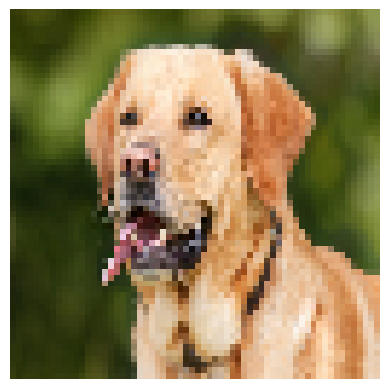

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction for cat_or_dog_1.jpg: DOG

New image: ./dl/cnn/single_prediction/cat_or_dog_2.jpg


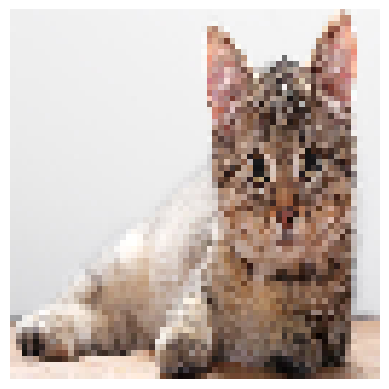

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Prediction for cat_or_dog_2.jpg: CAT



In [168]:
# loop through all the images in the folder: 
folder_path = './dl/cnn/single_prediction'
for filename in os.listdir(folder_path):
    # path of the image
    img_path = os.path.join(folder_path, filename)
    print(f"New image: {img_path}")

    # To use our CNN for a single prediction, we first load the image and resize it to the same dimensions (64x64) used during training.
    # This ensures compatibility with our model’s input layer. Then, we convert the image into an array and add an extra dimension to match 
    # the batch format the CNN expects.

    # Load and preprocess the image
    test_image = image.load_img(img_path, target_size=(64, 64))

    # Display the image
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()

    # Convert the image to an array format (PIL format to numpy array)
    test_image = image.img_to_array(test_image)
    # Add an extra dimension to create a batch of one image
    test_image = np.expand_dims(test_image, axis=0)

    # With the image in the correct format, we can now use the CNN’s predict method to classify the image. 
    # The model will output a prediction value (either 0 or 1), where each value corresponds to a specific class (0 = cat, 1 = dog).
    # The prediction output is a numerical value, which we interpret by checking if it matches the expected class labels. 
    # Based on the value, we can print whether the model classified the image as a cat or a dog.
    
    # Make a prediction 
    result = cnn.predict(test_image)
    
    # Determine the class
    if result[0][0] == 1:
        prediction = 'DOG'
    else:
        prediction = 'CAT'
    
    # Print the result
    print(f"Prediction for {filename}: {prediction}")
    print()


